In [22]:
import pandas as pd
from IPython.display import display

In [23]:
import matplotlib.pyplot as plt
import os

In [24]:
mACStatus = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mACStatus.parquet')
mActivity = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mActivity.parquet')
mAmbience = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mAmbience.parquet')
mBle = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mBle.parquet')
mGPS = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mGPS.parquet')
mScreenStatus = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mScreenStatus.parquet')
mUsageStats = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mUsageStats.parquet')
mWifi = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_mWifi.parquet')
wHr = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_wHr.parquet')
wLight = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_wLight.parquet')
wPedo = pd.read_parquet('/Users/jhlee/Desktop/고려대학교/4-1/데이터과학/프로젝트/ETRI_lifelog_dataset/ch2025_data_items/ch2025_wPedo.parquet')

# mACStatus


In [4]:
display(mACStatus)

,subject_id,timestamp,m_charging
0,id01,2024-06-26 12:03:00,0
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0
...,...,...,...
939891,id10,2024-09-26 23:55:00,0
939892,id10,2024-09-26 23:56:00,0
939893,id10,2024-09-26 23:57:00,0
939894,id10,2024-09-26 23:58:00,0


In [25]:
mACStatus['timestamp'] = pd.to_datetime(mACStatus['timestamp'])
display(mACStatus['timestamp'].head())

0   2024-06-26 12:03:00
1   2024-06-26 12:04:00
2   2024-06-26 12:05:00
3   2024-06-26 12:06:00
4   2024-06-26 12:07:00
Name: timestamp, dtype: datetime64[ns]

In [26]:
def aggregate_charging(df, freq):
    return (
        df
        .set_index('timestamp')
        .groupby('subject_id')['m_charging']
        .resample(freq)
        .sum()
        .reset_index()
    )

# 3. Compute 5- and 10-minute aggregates
charging_5min  = aggregate_charging(mACStatus, '5T')
charging_10min = aggregate_charging(mACStatus, '10T')

/var/folders/hq/_frv_ntj02d_ynk43wvy6n780000gn/T/ipykernel_25975/677144279.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample(freq)
/var/folders/hq/_frv_ntj02d_ynk43wvy6n780000gn/T/ipykernel_25975/677144279.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample(freq)


In [27]:
display(charging_5min.head())
display(charging_10min.head())

,subject_id,timestamp,m_charging
0,id01,2024-06-26 12:00:00,0
1,id01,2024-06-26 12:05:00,0
2,id01,2024-06-26 12:10:00,0
3,id01,2024-06-26 12:15:00,0
4,id01,2024-06-26 12:20:00,0


,subject_id,timestamp,m_charging
0,id01,2024-06-26 12:00:00,0
1,id01,2024-06-26 12:10:00,0
2,id01,2024-06-26 12:20:00,0
3,id01,2024-06-26 12:30:00,0
4,id01,2024-06-26 12:40:00,0


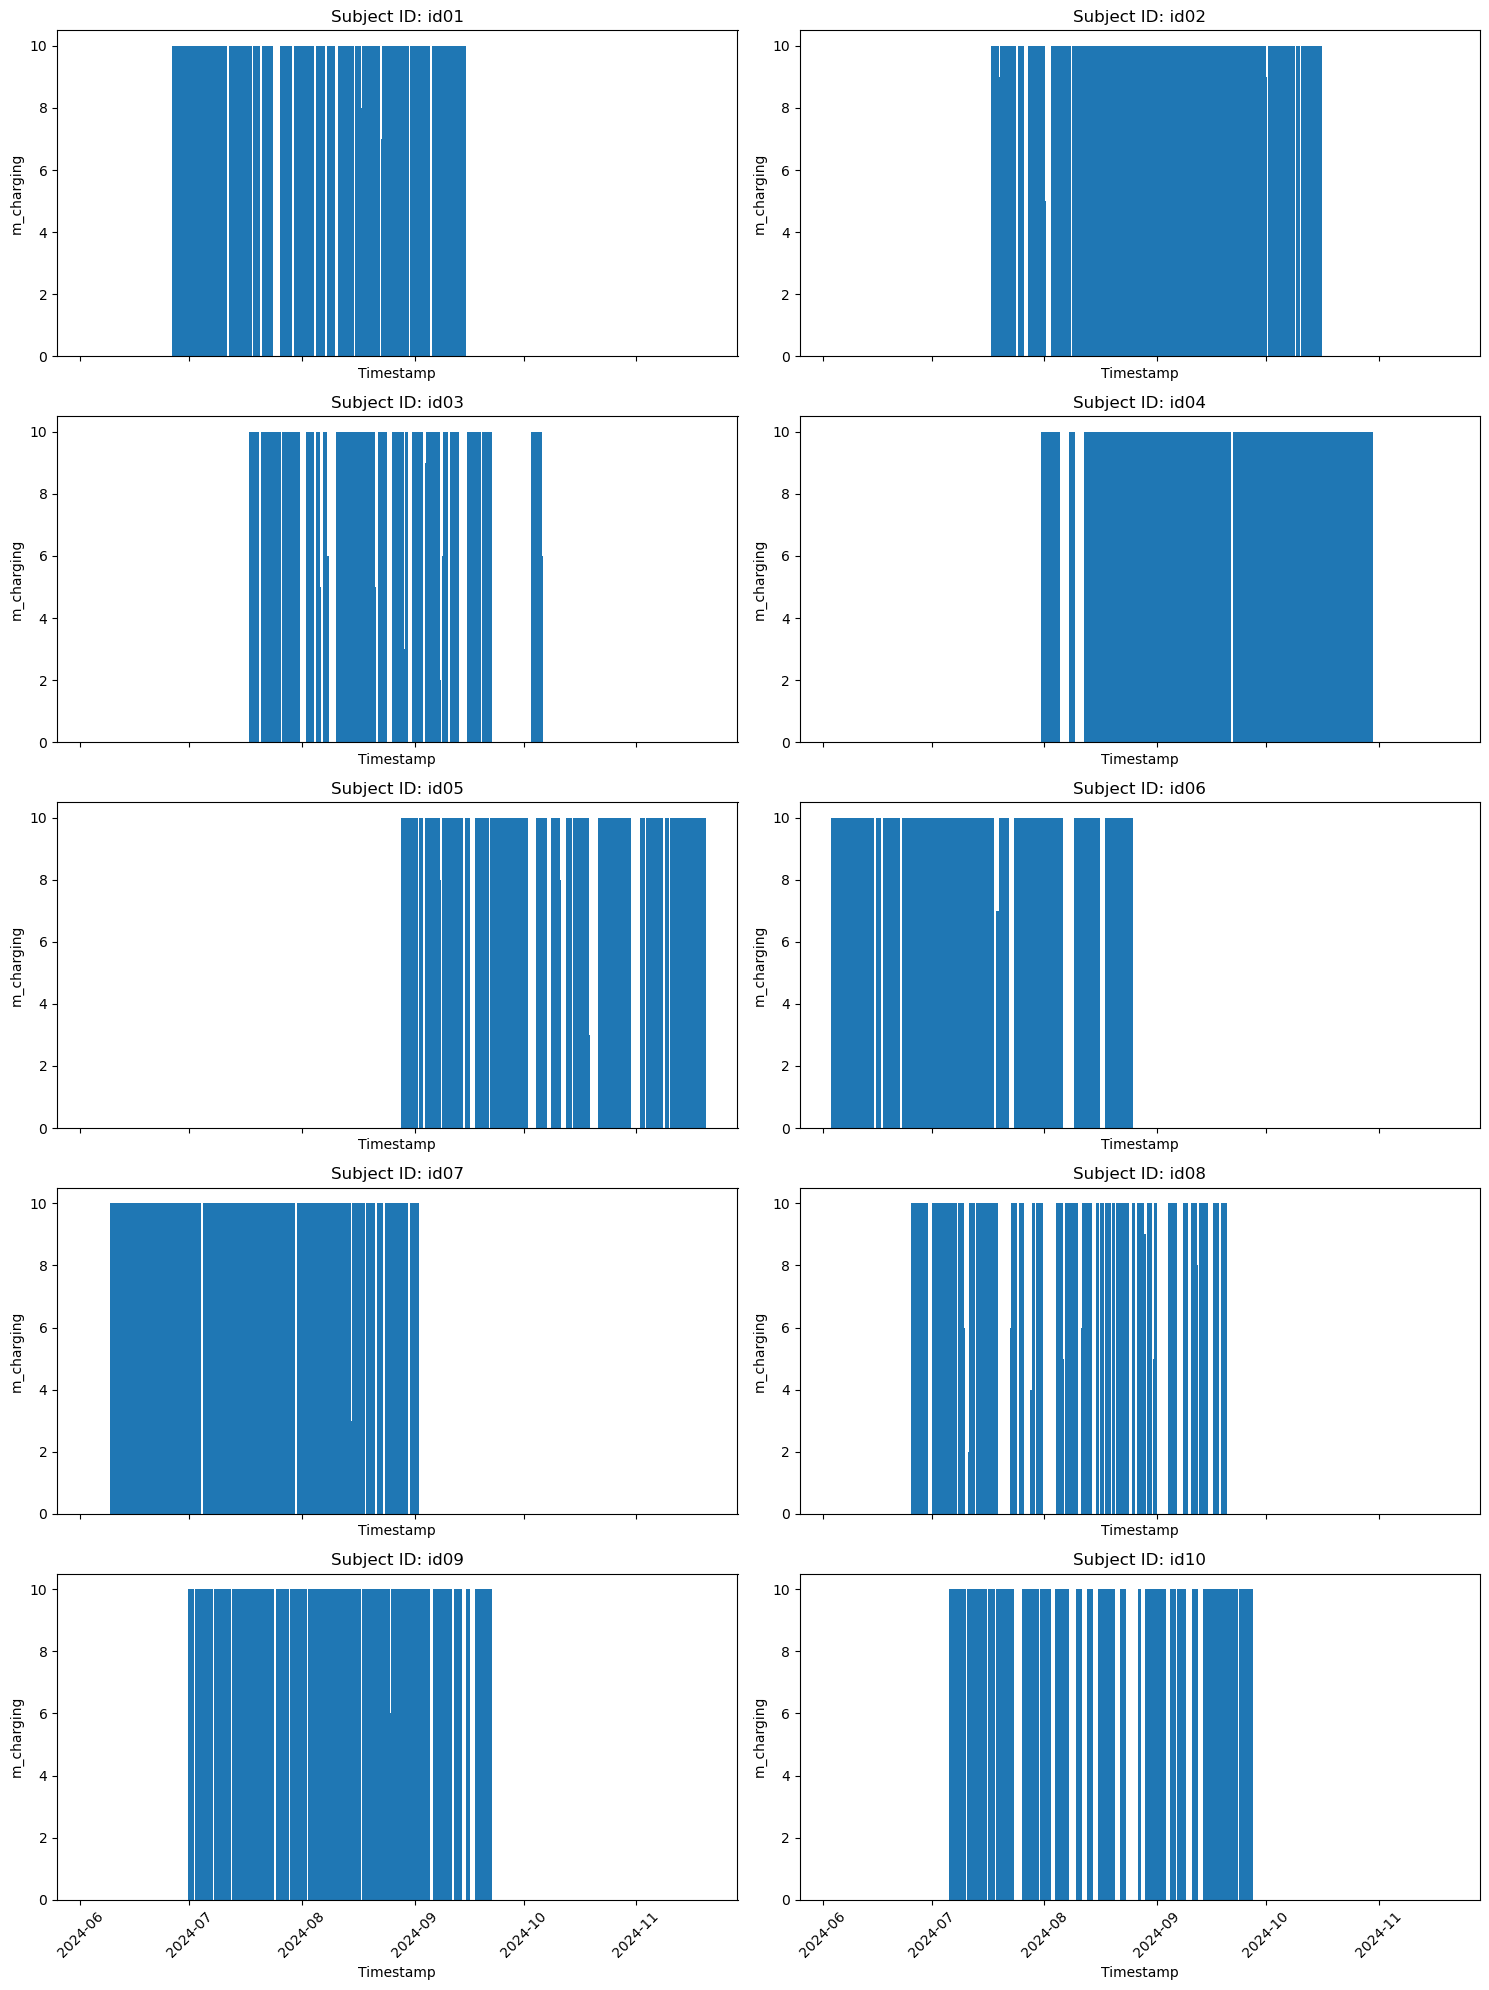

In [28]:
# 4. Get unique subject IDs (assuming 10 unique IDs)
subjects = charging_10min['subject_id'].unique()

# 5. Create a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), sharex=True)

# 6. Plot a bar chart for each subject
for ax, subj in zip(axes.flatten(), subjects):
    subset = charging_10min[charging_10min['subject_id'] == subj]
    ax.bar(subset['timestamp'], subset['m_charging'])
    ax.set_title(f"Subject ID: {subj}")
    ax.set_ylabel('m_charging')
    ax.set_xlabel('Timestamp')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

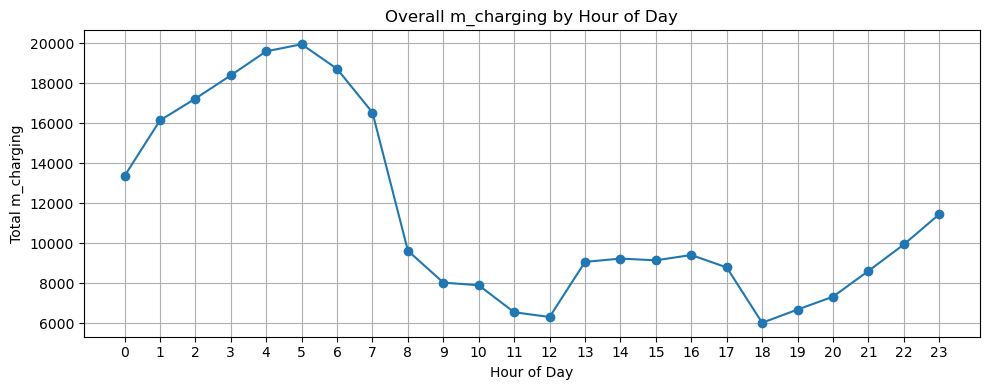

In [30]:
# 4) OVERALL USAGE BY HOUR (24-HOUR BASE)
charging_10min['hour'] = charging_10min['timestamp'].dt.hour
hourly = charging_10min.groupby('hour')['m_charging'].sum()

plt.figure(figsize=(10, 4))
hourly.plot(marker='o')
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Total m_charging')
plt.title('Overall m_charging by Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

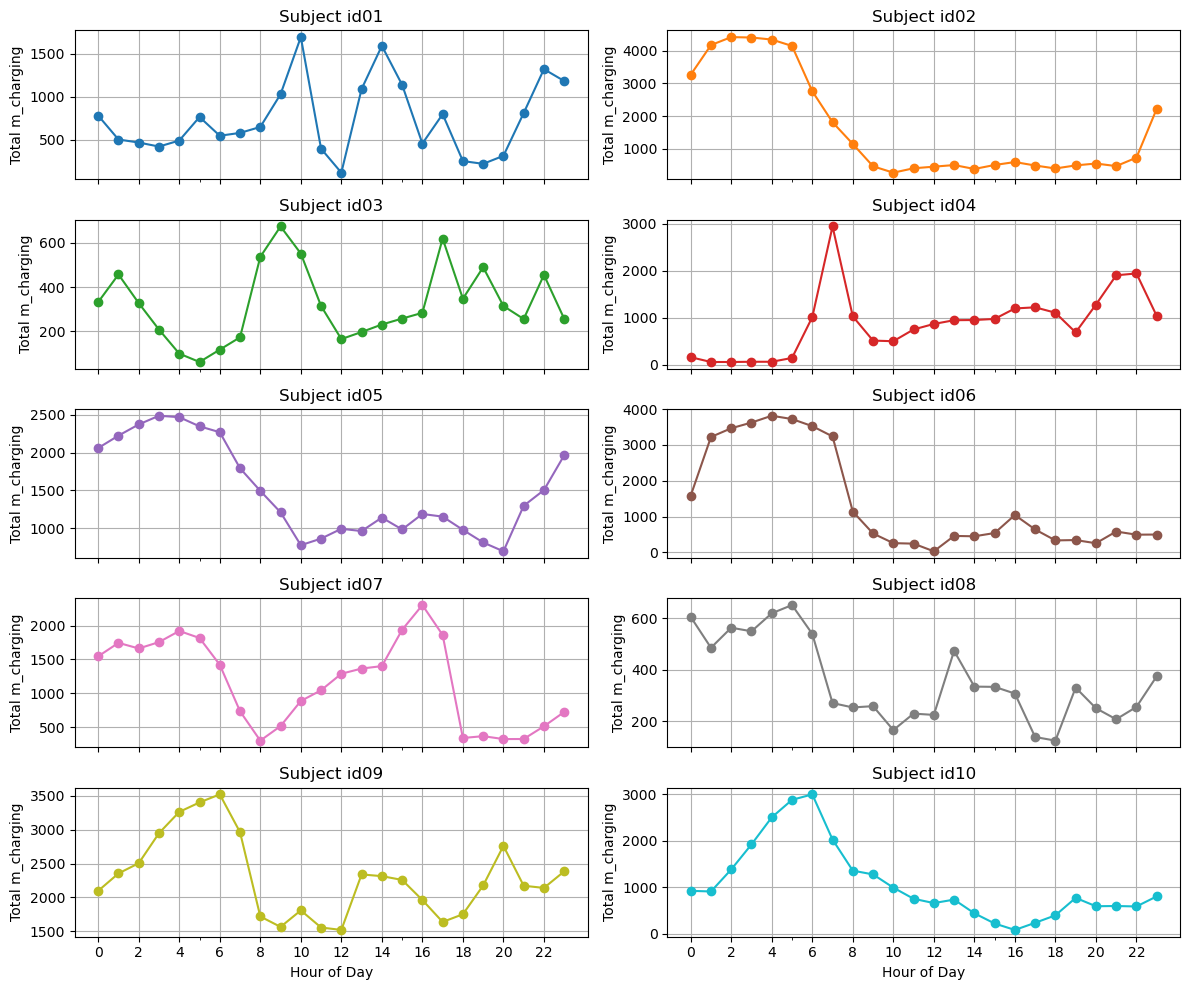

In [31]:

# Assuming charging_10min is your 10-minute aggregated DataFrame with columns:
# ['subject_id', 'timestamp', 'm_charging']

# 1) Extract hour of day
charging_10min['hour'] = charging_10min['timestamp'].dt.hour

# 2) Sum m_charging for each subject_id × hour
hourly_subject = (
    charging_10min
    .groupby(['subject_id', 'hour'])['m_charging']
    .sum()
    .unstack(level=0, fill_value=0)  # columns = subject_id
)

# 3) Plot one subplot per subject (5×2 grid)
axes = hourly_subject.plot(
    subplots=True,
    layout=(5, 2),
    figsize=(12, 10),
    sharex=True,
    legend=False,
    marker='o',
    title=[f"Subject {sid}" for sid in hourly_subject.columns]
)

# 4) Tweak each subplot
for ax in axes.flatten():
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Total m_charging')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True)

plt.tight_layout()
plt.show()


# mScreenStatus

In [32]:
mScreenStatus

,subject_id,timestamp,m_screen_use
0,id01,2024-06-26 12:03:00,0
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0
...,...,...,...
939648,id10,2024-09-26 23:52:00,0
939649,id10,2024-09-26 23:53:00,1
939650,id10,2024-09-26 23:54:00,1
939651,id10,2024-09-26 23:55:00,1


In [33]:
mScreenStatus.describe

<bound method NDFrame.describe of        subject_id           timestamp  m_screen_use
0            id01 2024-06-26 12:03:00             0
1            id01 2024-06-26 12:04:00             0
2            id01 2024-06-26 12:05:00             0
3            id01 2024-06-26 12:06:00             0
4            id01 2024-06-26 12:07:00             0
...           ...                 ...           ...
939648       id10 2024-09-26 23:52:00             0
939649       id10 2024-09-26 23:53:00             1
939650       id10 2024-09-26 23:54:00             1
939651       id10 2024-09-26 23:55:00             1
939652       id10 2024-09-26 23:56:00             1

[939653 rows x 3 columns]>

# mUsageStats

In [34]:
mUsageStats

,subject_id,timestamp,m_usage_stats
0,id01,2024-06-26 13:00:00,"[{'app_name': ' 캐시워크', 'total_time': 69}, {'ap..."
1,id01,2024-06-26 13:10:00,"[{'app_name': '통화', 'total_time': 26419}, {'ap..."
2,id01,2024-06-26 13:20:00,"[{'app_name': '메시지', 'total_time': 388651}, {'..."
3,id01,2024-06-26 13:30:00,"[{'app_name': '메시지', 'total_time': 211633}, {'..."
4,id01,2024-06-26 13:50:00,"[{'app_name': '카카오톡', 'total_time': 35446}, {'..."
...,...,...,...
45192,id10,2024-09-26 22:30:00,"[{'app_name': 'Threads', 'total_time': 120397}..."
45193,id10,2024-09-26 22:40:00,"[{'app_name': 'Threads', 'total_time': 240647}]"
45194,id10,2024-09-26 22:50:00,"[{'app_name': '카카오톡', 'total_time': 15283}, {'..."
45195,id10,2024-09-26 23:20:00,"[{'app_name': '카카오톡', 'total_time': 87617}, {'..."


In [35]:
mUsageStats['m_usage_stats'].iloc[0]

array([{'app_name': '\xa0캐시워크', 'total_time': 69},
       {'app_name': 'NAVER', 'total_time': 549},
       {'app_name': '\xa0✝️성경일독Q', 'total_time': 7337}], dtype=object)

In [36]:
# Explode the list of dictionaries into separate rows
mUsageStats_exploded = mUsageStats.explode('m_usage_stats').reset_index(drop=True)

#Flatten the nested dictionaries into separate columns
mUsageStats_flat = pd.json_normalize(mUsageStats_exploded['m_usage_stats'])

mUsageStats_final = pd.concat([mUsageStats_exploded.drop(columns=['m_usage_stats']), mUsageStats_flat], axis=1)

In [37]:
display(mUsageStats_final)
mUsageStats_final.describe()
mUsageStats_final['app_name'].unique()

,subject_id,timestamp,app_name,total_time
0,id01,2024-06-26 13:00:00,캐시워크,69
1,id01,2024-06-26 13:00:00,NAVER,549
2,id01,2024-06-26 13:00:00,✝️성경일독Q,7337
3,id01,2024-06-26 13:10:00,통화,26419
4,id01,2024-06-26 13:10:00,토스,119896
...,...,...,...,...
158421,id10,2024-09-26 22:50:00,One UI 홈,143367
158422,id10,2024-09-26 23:20:00,카카오톡,87617
158423,id10,2024-09-26 23:20:00,Threads,83951
158424,id10,2024-09-26 23:20:00,One UI 홈,4605


array(['\xa0캐시워크', 'NAVER', '\xa0✝️성경일독Q', '통화', '토스', '전화', '카카오톡',
       'One UI 홈', '메시지', '폴Pay', '하나카드', '쿠팡', 'help-CNUH24', 'Chrome',
       '권한 관리자', '롯데ON', 'GS SHOP', 'YouTube', 'Samsung Pass 자동 완성',
       '갤러리', 'Kia Connect', '카메라', '가나스윔', '캘린더', 'Melon', '하나은행', '후후',
       'Google', 'Withings', '설정', 'Wi-Fi 연결 팁', '시계',
       'Galaxy Watch5 Manager', '연락처', '네이트', '삼성카드', 'monimo', 'T world',
       '롯데홈쇼핑', '포스티', '갓피플성경', '패키지 설치 프로그램', 'Google Play 스토어', '전화 통화',
       'IntentResolver', '카카오뱅크', '경찰공제회 모바일창구', '카카오페이', '퀸잇', '이지웰',
       '네이버 지도', 'Start', 'Temu', '삼성 캡처', '신세계쇼핑', '오피넷', 'CJ온스타일',
       '계산기', '하나머니', 'Weawow', '스타벅스', '재난문자', 'AhnLab V3 Mobile Plus',
       'Samsung Wallet', '파일', '배달의민족', '내 파일', '개역개정 큰글성경', 'Meitu',
       'Android 시스템', '현대홈쇼핑', '올리브영', '미디어 선택 도구', 'NH뱅킹', '날씨', '하프클럽',
       'Google Play 서비스', '빅스비 보이스', 'Smart\u200bThings', '어시스턴트',
       'Samsung Notes', '삼성 키보드', 'Galaxy Themes', '음성 녹음', '포토 에디터',
       'AR 이모지 에

In [38]:
top_10_apps = mUsageStats_final['app_name'].value_counts().head(10)
print(top_10_apps)

app_name
One UI 홈    29114
카카오톡        17548
시스템 UI      16388
NAVER        7361
 캐시워크        5042
 ✝️성경일독Q     4615
YouTube      4566
통화           4364
메시지          3845
타임스프레드       3504
Name: count, dtype: int64


# Combine mScreenStatus with mUsageStats

In [40]:
print(mScreenStatus.shape)
print(mUsageStats_final.shape)

(939653, 3)
(158426, 4)


In [42]:
# Step 1: Convert timestamp to datetime and floor to 10-minute intervals
mUsageStats_final['timestamp'] = pd.to_datetime(mUsageStats_final['timestamp'])
mUsageStats_final['timestamp_10min'] = mUsageStats_final['timestamp'].dt.floor('10T')

mScreenStatus['timestamp'] = pd.to_datetime(mScreenStatus['timestamp'])
mScreenStatus['timestamp_10min'] = mScreenStatus['timestamp'].dt.floor('10T')

/var/folders/hq/_frv_ntj02d_ynk43wvy6n780000gn/T/ipykernel_25975/3352127306.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  mUsageStats_final['timestamp_10min'] = mUsageStats_final['timestamp'].dt.floor('10T')
/var/folders/hq/_frv_ntj02d_ynk43wvy6n780000gn/T/ipykernel_25975/3352127306.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  mScreenStatus['timestamp_10min'] = mScreenStatus['timestamp'].dt.floor('10T')


In [43]:
# Step 2: Aggregate mScreenStatus
screen_agg = (
    mScreenStatus
    .groupby(['subject_id', 'timestamp_10min'], as_index=False)
    .agg(m_screen_use=('m_screen_use', 'sum'))
)

In [44]:
# Step 3: Aggregate mUsageStats (long format preserved)
usage_agg = (
    mUsageStats_final
    .groupby(['subject_id', 'timestamp_10min', 'app_name'], as_index=False)
    .agg(total_time=('total_time', 'sum'))
)

In [45]:
# ===============================
# Option A: KEEP apps even if m_screen_use = 0
# ===============================
merged_keep = usage_agg.merge(
    screen_agg,
    how='left',
    on=['subject_id', 'timestamp_10min']
).fillna({'m_screen_use': 0}).sort_values(['subject_id', 'timestamp_10min'])

In [46]:
display(merged_keep.head(20))

,subject_id,timestamp_10min,app_name,total_time,m_screen_use
0,id01,2024-06-26 13:00:00,NAVER,549,5.0
1,id01,2024-06-26 13:00:00,✝️성경일독Q,7337,5.0
2,id01,2024-06-26 13:00:00,캐시워크,69,5.0
3,id01,2024-06-26 13:10:00,NAVER,67042,10.0
4,id01,2024-06-26 13:10:00,One UI 홈,209417,10.0
5,id01,2024-06-26 13:10:00,✝️성경일독Q,1504,10.0
6,id01,2024-06-26 13:10:00,전화,59284,10.0
7,id01,2024-06-26 13:10:00,카카오톡,6744,10.0
8,id01,2024-06-26 13:10:00,토스,119896,10.0
9,id01,2024-06-26 13:10:00,통화,26419,10.0


In [47]:
# ===============================
# Option B: DROP apps when m_screen_use = 0
# ===============================
merged_drop = merged_keep[merged_keep['m_screen_use'] > 0].copy()

In [ ]:
display(merged_drop.head(15))

,subject_id,timestamp_10min,app_name,total_time,m_screen_use
0,id01,2024-06-26 13:00:00,NAVER,549,5.0
1,id01,2024-06-26 13:00:00,✝️성경일독Q,7337,5.0
2,id01,2024-06-26 13:00:00,캐시워크,69,5.0
3,id01,2024-06-26 13:10:00,NAVER,67042,10.0
4,id01,2024-06-26 13:10:00,One UI 홈,209417,10.0
5,id01,2024-06-26 13:10:00,✝️성경일독Q,1504,10.0
6,id01,2024-06-26 13:10:00,전화,59284,10.0
7,id01,2024-06-26 13:10:00,카카오톡,6744,10.0
8,id01,2024-06-26 13:10:00,토스,119896,10.0
9,id01,2024-06-26 13:10:00,통화,26419,10.0


In [49]:
print(merged_drop.shape)
print(merged_keep.shape)

(106839, 5)
(158425, 5)


# mActivity

In [13]:
mActivity

,subject_id,timestamp,m_activity
0,id01,2024-06-26 12:03:00,4
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0
...,...,...,...
961057,id10,2024-09-26 23:55:00,3
961058,id10,2024-09-26 23:56:00,3
961059,id10,2024-09-26 23:57:00,3
961060,id10,2024-09-26 23:58:00,3


# mBle

In [14]:
mBle

,subject_id,timestamp,m_ble
0,id01,2024-06-26 12:13:00,"[{'address': '00:15:7C:11:80:8D', 'device_clas..."
1,id01,2024-06-26 12:23:00,"[{'address': '0A:B1:26:4D:76:21', 'device_clas..."
2,id01,2024-06-26 12:33:00,"[{'address': '04:F5:AE:39:95:E0', 'device_clas..."
3,id01,2024-06-26 13:23:00,"[{'address': '06:C0:D2:6D:9F:69', 'device_clas..."
4,id01,2024-06-26 14:23:00,"[{'address': '10:2B:41:74:9F:B1', 'device_clas..."
...,...,...,...
21825,id10,2024-09-26 21:57:00,"[{'address': '28:79:C3:29:8C:A7', 'device_clas..."
21826,id10,2024-09-26 22:07:00,"[{'address': '00:96:C5:38:F3:50', 'device_clas..."
21827,id10,2024-09-26 22:17:00,"[{'address': '00:CE:69:A4:D0:15', 'device_clas..."
21828,id10,2024-09-26 22:47:00,"[{'address': '12:05:4F:E9:91:27', 'device_clas..."


In [50]:
# Explode the list of dictionaries into separate rows
mBle_exploded = mBle.explode('m_ble').reset_index(drop=True)

#Flatten the nested dictionaries into separate columns
mble_flat = pd.json_normalize(mBle_exploded['m_ble'])

mBle_final = pd.concat([mBle_exploded.drop(columns=['m_ble']), mble_flat], axis=1)

In [51]:
display(mBle_final)

,subject_id,timestamp,address,device_class,rssi
0,id01,2024-06-26 12:13:00,00:15:7C:11:80:8D,0,-82.0
1,id01,2024-06-26 12:13:00,01:B1:D2:20:9E:3A,0,-61.0
2,id01,2024-06-26 12:13:00,04:33:1F:D9:C1:50,0,-86.0
3,id01,2024-06-26 12:13:00,06:5C:2D:BC:39:BE,0,-75.0
4,id01,2024-06-26 12:13:00,09:42:21:0D:AD:DF,0,-70.0
...,...,...,...,...,...
437051,id10,2024-09-26 23:57:00,4D:2A:98:07:6F:C7,0,-96.0
437052,id10,2024-09-26 23:57:00,58:3E:B1:FE:08:FF,0,-84.0
437053,id10,2024-09-26 23:57:00,64:12:36:25:0A:75,0,-77.0
437054,id10,2024-09-26 23:57:00,64:12:36:E2:BB:2D,0,-95.0


# mWifi

In [15]:
mWifi

,subject_id,timestamp,m_wifi
0,id01,2024-06-26 12:03:00,"[{'bssid': 'a0:0f:37:9a:5d:8b', 'rssi': -78}, ..."
1,id01,2024-06-26 12:13:00,"[{'bssid': 'a0:0f:37:9a:5d:8b', 'rssi': -79}, ..."
2,id01,2024-06-26 12:23:00,"[{'bssid': '10:e3:c7:0a:74:d1', 'rssi': -78}, ..."
3,id01,2024-06-26 12:33:00,"[{'bssid': '10:e3:c7:09:7f:bc', 'rssi': -80}, ..."
4,id01,2024-06-26 12:43:00,"[{'bssid': '56:46:ae:59:b1:13', 'rssi': -44}, ..."
...,...,...,...
76331,id10,2024-09-26 22:47:00,"[{'bssid': '50:46:ae:3b:2b:c7', 'rssi': -60}, ..."
76332,id10,2024-09-26 23:17:00,"[{'bssid': '50:46:ae:3b:2b:c7', 'rssi': -61}, ..."
76333,id10,2024-09-26 23:27:00,"[{'bssid': '50:46:ae:3b:2b:c7', 'rssi': -59}, ..."
76334,id10,2024-09-26 23:47:00,"[{'bssid': '50:46:ae:3b:2b:c7', 'rssi': -61}, ..."
